<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/4%EC%9E%A5%20%EC%98%A4%EC%B0%A8%20%EC%88%98%EC%A0%95%20%3A%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95%2C%20%20%EB%8B%A4%EC%A4%91%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 04 장 오차 수정 : 경사 하강법


## 경사 하강법 Gradient descent

아래의 그래프는 기울기-오차 간의 관계이다.</br>오차가 가장 작은 부분은 그래프의 가장 아래쪽의 볼록한 부분이 된다. 이 때 꼭짓점의 기울기는 x축과 평행한 선이 된다.</br>다시 말해 기울기가 0이 된다. 따라서 이와 같은 '미분 값이 0인 지점'을 찾아야하는 것이다.

- (1) : 처음 위치에서 미분 값을 구한다.
- (2) : 구해진 기울기의 ***반대 방향***으로 얼마간 이동시킨 위치에서 다시 미분 값을 구한다.
- (3) : 위에서 구한 미분 값이 0이 아니면 (2)의 과정을 다시 반복한다.

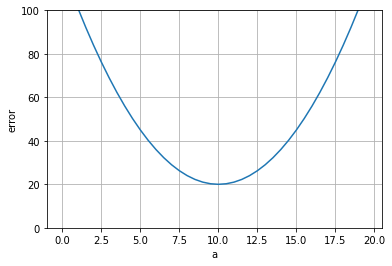

In [1]:
# 경사 하강법

import numpy as np
import matplotlib.pyplot as plt

# 기울기 - 오차 간의 관계 그래프
data_x = np.arange(0, 20, .5)
data_y = (data_x - 10)**2 + 20

plt.plot(data_x, data_y)
plt.grid()
plt.xlabel('a')
plt.ylabel('error')
plt.ylim(0, 100)
plt.show()

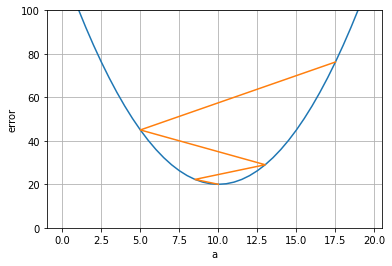

In [2]:
# rough example of Gradient descent
# this graph does not consider the 'REAL GRADIENT'
# just showing the ideal method
ex_x = np.array([7.5, -5, 3, -1.5, 0])
ex_y = ex_x**2 + 20
ex_x = ex_x + 10

plt.plot(data_x, data_y)
plt.plot(ex_x, ex_y)
plt.grid()
plt.xlabel('a')
plt.ylabel('error')
plt.ylim(0, 100)
plt.show()

## 평균제곱오차 MSE 편미분 계산

$MSE = \frac{1}{n}\sum\limits_{i}^n (\hat{y}_{i}-y_{i})^{2} = \frac{1}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b))^{2}$, $(\hat{y}_{i} = 실제 값, y_{i} = 예측 값)$

$\frac{\partial}{\partial a}MSE(a, b) = -\frac{2}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b))x_{i} = -\frac{2}{n}\sum\limits_{i}^n error_{i}x_{i}$

$\frac{\partial}{\partial b}MSE(a, b) = -\frac{2}{n}\sum\limits_{i}^n (\hat{y}_{i}-(ax_{i} + b)) = -\frac{2}{n}\sum\limits_{i}^n error_{i}$


위의 편미분 결과 값에 '학습률 learning rate'을 곱하여 기존의 기울기 $a$와 절편 $b$를 업데이트 하는 것이 앞서 설명한 경사 하강법의 (2)번째 과정이다.

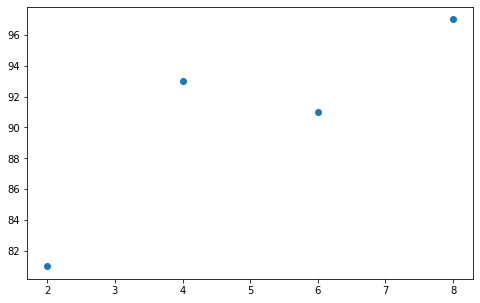

epoch=0, 기울기=23.2000, 절편=4.5250, (a_diff=-928.00000, b_diff=-181.00000)
epoch=100, 기울기=7.9316, 절편=45.3932, (a_diff=1.84111, b_diff=-10.98697)
epoch=200, 기울기=4.7953, 절편=64.1094, (a_diff=0.81577, b_diff=-4.86815)
epoch=300, 기울기=3.4056, 절편=72.4022, (a_diff=0.36145, b_diff=-2.15700)
epoch=400, 기울기=2.7899, 절편=76.0766, (a_diff=0.16015, b_diff=-0.95573)
epoch=500, 기울기=2.5171, 절편=77.7047, (a_diff=0.07096, b_diff=-0.42347)
epoch=600, 기울기=2.3962, 절편=78.4261, (a_diff=0.03144, b_diff=-0.18763)
epoch=700, 기울기=2.3426, 절편=78.7457, (a_diff=0.01393, b_diff=-0.08314)
epoch=800, 기울기=2.3189, 절편=78.8873, (a_diff=0.00617, b_diff=-0.03684)
epoch=900, 기울기=2.3084, 절편=78.9501, (a_diff=0.00274, b_diff=-0.01632)
epoch=1000, 기울기=2.3037, 절편=78.9779, (a_diff=0.00121, b_diff=-0.00723)
epoch=1100, 기울기=2.3016, 절편=78.9902, (a_diff=0.00054, b_diff=-0.00320)
epoch=1200, 기울기=2.3007, 절편=78.9957, (a_diff=0.00024, b_diff=-0.00142)
epoch=1300, 기울기=2.3003, 절편=78.9981, (a_diff=0.00011, b_diff=-0.00063)
epoch=1400, 기울기=2.3001, 절편

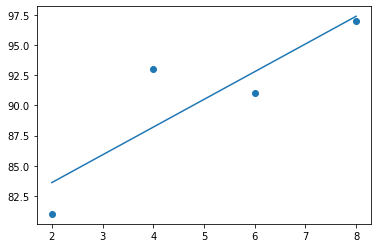

In [16]:
# 전체 코드정리

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 공부 시간 X 와 성적 Y의 리스트 생성
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

# 리스트를 넘파이 배열로 변환
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.025

# 몇 번 반복될 지 설정
epochs = 2001

# 경사 하강법
for i in range(epochs):
  y_pred = a * x_data + b
  error = y_data - y_pred
  
  # 오차 함수를 미분한 값
  a_diff = -(2/len(x_data))*sum(x_data * error)
  b_diff = -(2/len(x_data))*sum(error)

  a = a - lr*a_diff
  b = b - lr*b_diff

  if i%100 == 0:
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f, (a_diff=%.05f, b_diff=%.05f)" % (i, a, b, a_diff, b_diff))
    
#앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기

y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

기울기$a와 b$가 2.3과 79에 수렴하는 과정을 볼 수 있다. 

이와 같은 방식으로 $x$가 여러 개인 다중 선형 회귀모델에서도 사용할 수 있다.

## 다중 선형 회귀